In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
bank = pd.read_csv("bank.csv")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.shape

(11162, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


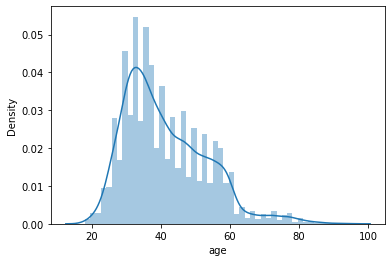

In [7]:
sns.distplot(bank["age"])
plt.show()

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
bank["job"].value_counts(),bank.shape

(management       2566
 blue-collar      1944
 technician       1823
 admin.           1334
 services          923
 retired           778
 self-employed     405
 student           360
 unemployed        357
 entrepreneur      328
 housemaid         274
 unknown            70
 Name: job, dtype: int64,
 (11162, 17))

In [11]:
bank["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [13]:
bank["job"].value_counts().values

array([2566, 1944, 1823, 1334,  923,  778,  405,  360,  357,  328,  274,
         70])

In [15]:
bank["job"].value_counts().keys()

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'unknown'],
      dtype='object')

<AxesSubplot:xlabel='job', ylabel='count'>

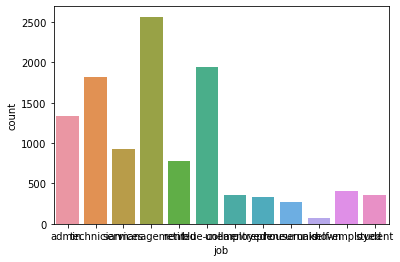

In [19]:
sns.countplot(x=bank["job"])

<AxesSubplot:xlabel='marital', ylabel='count'>

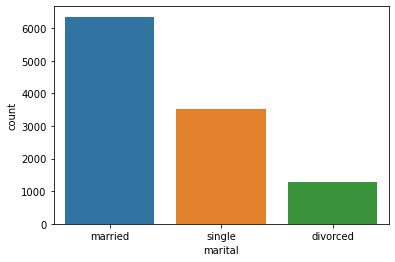

In [22]:
sns.countplot(x=bank["marital"])

<AxesSubplot:xlabel='education', ylabel='count'>

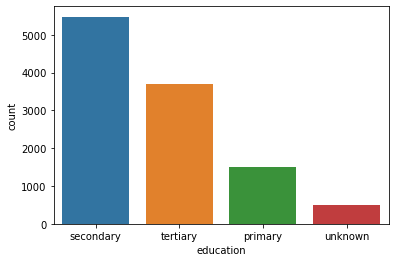

In [23]:
sns.countplot(x=bank["education"])

In [25]:
bank["loan"].value_counts(),bank.shape

(no     9702
 yes    1460
 Name: loan, dtype: int64,
 (11162, 17))

<AxesSubplot:xlabel='loan', ylabel='count'>

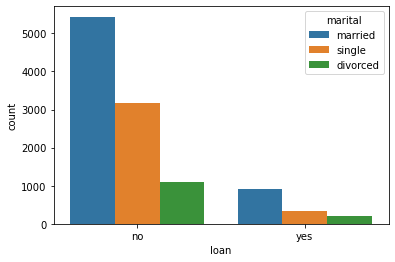

In [34]:
sns.countplot(x=bank["loan"],data=bank,hue ="marital")

In [35]:
X=bank[["age"]]
y = bank[["balance"]]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 40)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfg = RandomForestRegressor()

In [44]:
rfg.fit(X_train,y_train)

<ipython-input-44-9808ede200ee>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg.fit(X_train,y_train)


RandomForestRegressor()

In [47]:
y_pred = rfg.predict(X_test)

In [48]:
y_test.head(),y_pred[0:5]

(      balance
 8211        9
 9207     1970
 8491     1579
 8918     1151
 2256     1779,
 array([1262.58844451, 1374.71014366, 1216.82603765, 2365.22385517,
         979.03985077]))

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test,y_pred)

9365708.343225833